<a href="https://colab.research.google.com/github/ricky-kiva/dl-tensorflow-intro/blob/main/4_l1_image_data_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training with ImageDataGenerator

Get the dataset: [Horses or Humans](https://www.tensorflow.org/datasets/catalog/horses_or_humans)

In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-09-11 05:28:18--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.114.207, 172.217.214.207, 108.177.111.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.114.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   107MB/s    in 1.3s    

2023-09-11 05:28:19 (107 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [2]:
# import libraries
import zipfile
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array

import numpy as np
import random

Unzip the dataset

In [3]:
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r') # open zip file in READ mode
zip_ref.extractall('./horse-or-human') # extract the zip
zip_ref.close()

Referencing the image directory

In [4]:
# directory for training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# directory for training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

Referencing the label directory

In [5]:
train_horse_names = os.listdir(train_horse_dir) # get the list of items in directory
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse23-6.png', 'horse27-0.png', 'horse29-2.png', 'horse28-5.png', 'horse26-8.png', 'horse15-7.png', 'horse25-8.png', 'horse23-7.png', 'horse11-5.png', 'horse42-7.png']
['human04-19.png', 'human04-14.png', 'human11-18.png', 'human17-08.png', 'human01-22.png', 'human12-20.png', 'human17-17.png', 'human15-20.png', 'human11-27.png', 'human04-18.png']


Print number of train files

In [6]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


Visualize samples of images

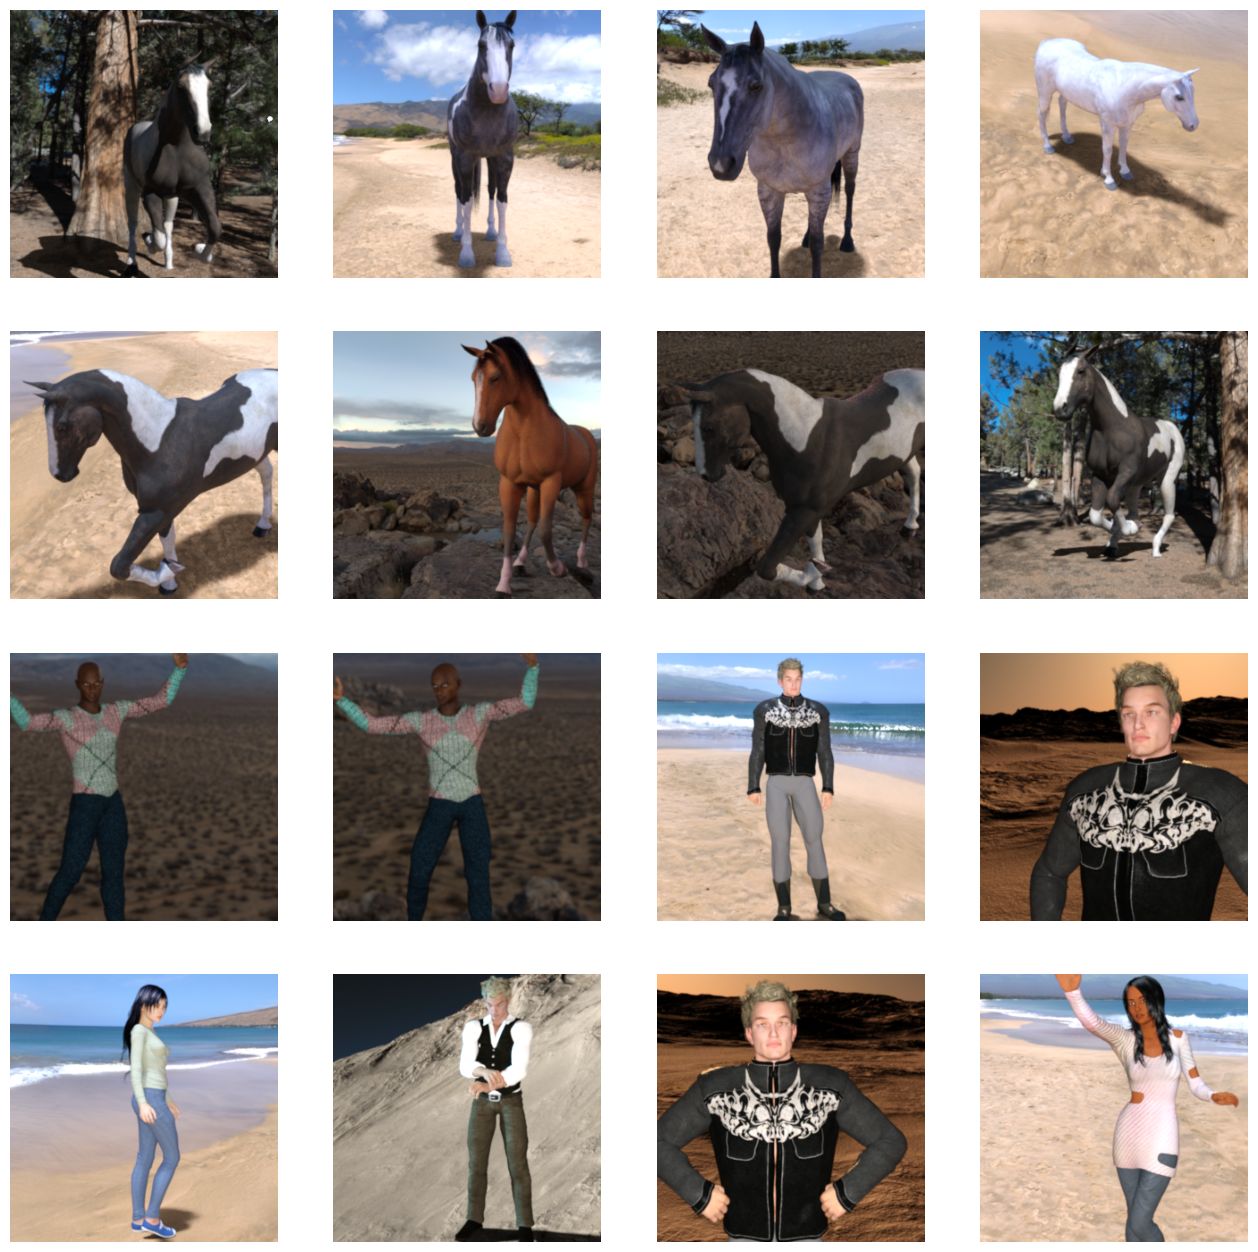

In [7]:
# display the plot inline (it's already configured in Colab)
%matplotlib inline

nrows, ncols = 4, 4

fig = plt.gcf() # get current figures (allow make changes to existing figures)
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index = 0
pic_index += 8

# iterate the path of each file name to a list
next_horse_pix = [os.path.join(train_horse_dir, fname)
                  for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                  for fname in train_human_names[pic_index-8:pic_index]]

# plot the images inside concatenated next_horse_pix & next_human_pix
for i, img_path in enumerate(next_horse_pix + next_human_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Build the model

In [8]:
model = tf.keras.models.Sequential([
    # first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    # second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    # third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    # fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    # fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    # fully connected layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

Compile the model

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.0001),
              metrics=['accuracy'])

**Optimizer**: adjust the internal settings (parameters) of the neural network to make the predictions closer to correct answers

**Adam** vs **RMSprop**:
1.   **Adam**
*   Strengths:
  *   adaptive learning rates: adjust learning rates for each parameter individually. efficient for complex, noisy, & large datasets
  *   Momentum: combines benefits of both **RMSProp** & **Momentum**, help navigating flat/noisy regions of the optimization landscape
*   Considerations:
  *   sensitive to Hyperparameters: Adam has more hyperparameters to tune. it require experimentation to find the best settings for specific problems

2.   **RMSprop**
*   Strengths:
  *   stable learning: good at stabilizing learning process. it's less likely to overshoot/oscilate during training
  *   simplicity: has fewer parameters compared to **Adam**, making it easier to use 'out of the box'
*   Considerations:
  *   less adaptive: may not adapt as quickly to changes in data or model as **Adam**

**Binary Crossentropy**: uses **only 2 possible classes** to measure how well a neural network predictions match the actual target value

Data preprocessing using **ImageDataGenerator**

In [10]:
# instantiate ImageDataGenerator & rescale (normalize)
train_datagen = ImageDataGenerator(rescale=1/255)

# flow training images in batches of 128 using generator
train_generator = train_datagen.flow_from_directory(
    './horse-or-human/',
    target_size=(300, 300),
    batch_size=128, # number of samples in each batch of data
    class_mode='binary' # need 'binary' label because we use binary_crossentropy loss
)

Found 1027 images belonging to 2 classes.


Train the model

In [11]:
history = model.fit(
    train_generator,
    # number of steps (batches of samples) to process before moviing to the next epoch
    steps_per_epoch=8, # training samples total / batch size (1000/128)
    epochs=15,
    verbose=1
)

Epoch 1/15
8/8 [==============================] - 143s 15s/step - loss: 0.6890 - accuracy: 0.5328
Epoch 2/15
8/8 [==============================] - 125s 15s/step - loss: 0.6733 - accuracy: 0.5929
Epoch 3/15
8/8 [==============================] - 129s 15s/step - loss: 0.6643 - accuracy: 0.7475
Epoch 4/15
8/8 [==============================] - 136s 17s/step - loss: 0.6153 - accuracy: 0.7686
Epoch 5/15
8/8 [==============================] - 138s 17s/step - loss: 0.5749 - accuracy: 0.8654
Epoch 6/15
8/8 [==============================] - 135s 16s/step - loss: 0.5572 - accuracy: 0.7964
Epoch 7/15
8/8 [==============================] - 150s 19s/step - loss: 0.4584 - accuracy: 0.9316
Epoch 8/15
8/8 [==============================] - 128s 16s/step - loss: 0.4193 - accuracy: 0.8320
Epoch 9/15
8/8 [==============================] - 112s 14s/step - loss: 0.3599 - accuracy: 0.8932
Epoch 10/15
8/8 [==============================] - 116s 14s/step - loss: 0.2963 - accuracy: 0.9333
Epoch 11/15
8/8 [==

Predicting some images from external source

In [12]:
from google.colab import files

# get image from
uploaded = files.upload()

for fn in uploaded.keys():
  # load the img
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))

  x = img_to_array(img) # outputs a PIL image
  x /= 255 # normalize the image
  x = np.expand_dims(x, axis=0) # add 1 dim, because `vstack` need to be covered by 1 extra dimension

  images = np.vstack([x]) # GPT says it is redundant, because we already add dimension using `expand_dims()`
  classes = model.predict(images, batch_size=10) # batch_size(10) used to predict 10 images at a time
  print(classes[0])

  if(classes[0] > 0.5):
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving reza-albian-jawas-bangkit.jpg to reza-albian-jawas-bangkit.jpg
1/1 [==============================] - 0s 235ms/step
[0.00036349]
reza-albian-jawas-bangkit.jpg is a horse


Visualize intermediate representation (how an input gets transformed as it goes through the model)

1/1 [==============================] - 0s 170ms/step


<ipython-input-13-6a8e4b0ef9cc>:33: RuntimeWarning: invalid value encountered in divide
  x /= x.std() # normalize the values by dividing by standard deviation


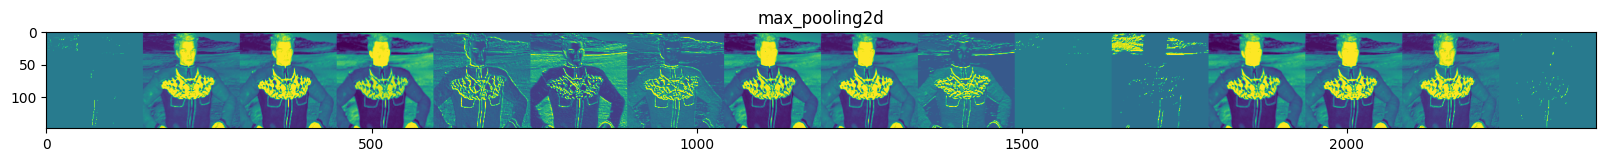

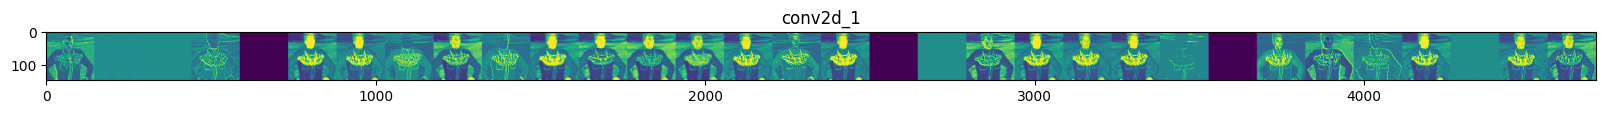

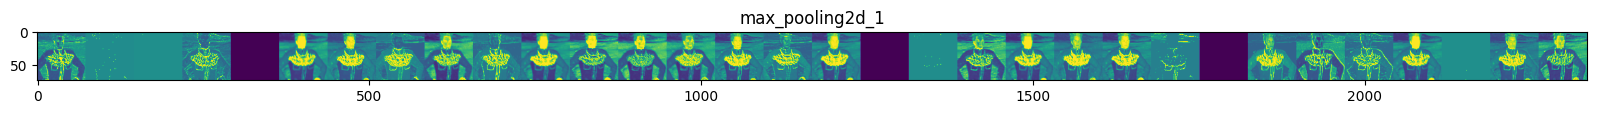

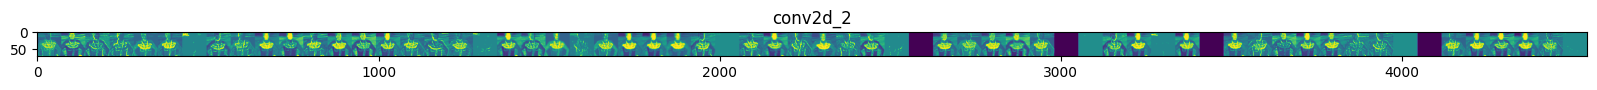

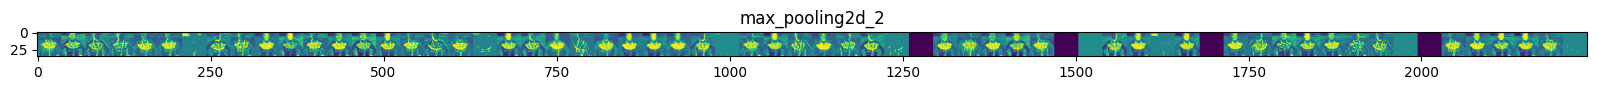

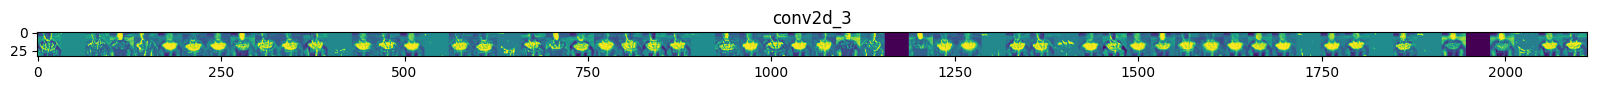

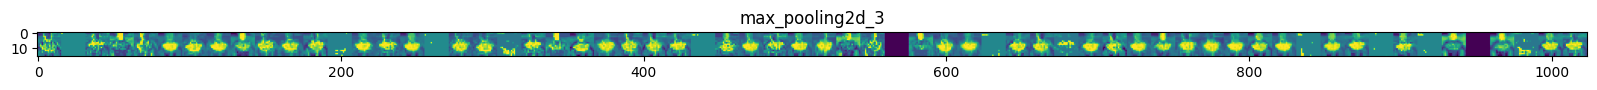

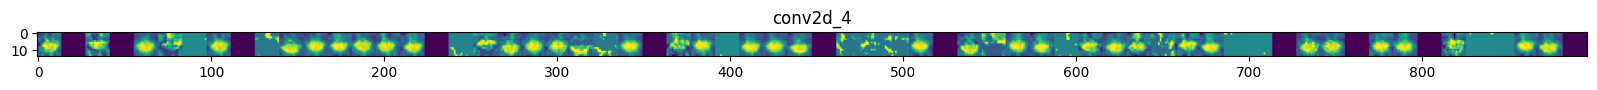

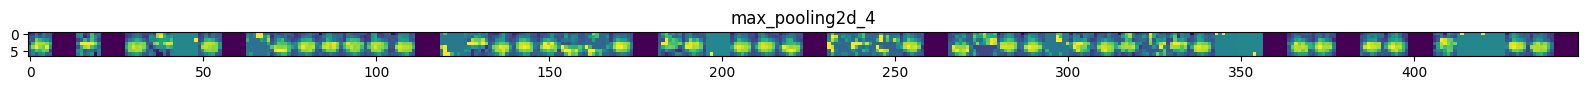

In [13]:
successive_outputs = [layer.output for layer in model.layers[1:]] # get the output of each layer

# create new model with the same input as model but outputs each layer's output in `successive_outputs`
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_outputs)

horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300)) # PIL image
x = img_to_array(img) # numpy array with shape of (300, 300, 3)
x = x.reshape((1,) + x.shape) # numpy array with shape (1, 300, 300, 3)

# normalize by 1/255
x /= 255

# run the image through network, predicting it, while obtaining all intermediate representations of the image
successive_feature_maps = visualization_model.predict(x)

# get name of each layer in the model
layer_names = [layer.name for layer in model.layers[1:]]

# print each layer's feature maps in a row
for layer_name, feature_map in zip(layer_names, successive_feature_maps): # zip pair the elemets based on their position
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1] # number of features in feature map
    size = feature_map.shape[1] # size of the feature map. feature map has shape (1, size, size, n_features)

    # tile the images in the row matrix
    display_grid = np.zeros((size, (size * n_features)))
    for i in range(n_features):
      x = feature_map[0, :, :, i] # extracts 2D slice from feature_map
      x -= x.mean() # substract every values by the mean, centers the data around zero. it highlight regions where the feature map responded strongly
      x /= x.std() # normalize the values by dividing by standard deviation
      x *= 64 # adjust contrast by scaling the values
      x += 128 # shift the values intensity range between 0 & 255. increase the visibility of visualization
      x = np.clip(x, 0, 255).astype('uint8') # ensure all values between 0 & 255 by clipping, and convert it to integers

      # tile each filter into the big horizontal grid
      display_grid[:, (i * size) : ((i + 1) * size)] = x # `(i * size) : ((i + 1) * size)` will define the column width

    # display the grid
    scale = 20 / n_features # dissect 20 row length to n_features
    plt.figure(figsize=((scale * n_features), scale)) # set figure size
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

terminate kernel, free memory resources

In [14]:
from google.colab import runtime
runtime.unassign()

# Note

### Old version Safari

If you're using Safari and the cell above throws an error, you will need to upload the images(s) manually in their workspace.

Instructions on how to upload image(s) manually in a Colab:

1. Select the `folder` icon on the left `menu bar`.
2. Click on the `folder with an arrow pointing upwards` named `..`
3. Click on the `folder` named `tmp`.
4. Inside of the `tmp` folder, `create a new folder` called `images`. You'll see the `New folder` option by clicking the `3 vertical dots` menu button next to the `tmp` folder.
5. Inside of the new `images` folder, upload an image(s) of your choice, preferably of either a horse or a human. Drag and drop the images(s) on top of the `images` folder.
6. Uncomment and run the code block below.

In [1]:
# # CODE BLOCK FOR OLD VERSIONS OF SAFARI

# import numpy as np
# from tensorflow.keras.utils import load_img, img_to_array
# import os

# images = os.listdir("/tmp/images")

# print(images)

# for i in images:
#  print()
#  # predicting images
#  path = '/tmp/images/' + i
#  img = load_img(path, target_size=(300, 300))
#  x = img_to_array(img)
#  x /= 255
#  x = np.expand_dims(x, axis=0)

#  images = np.vstack([x])
#  classes = model.predict(images, batch_size=10)
#  print(classes[0])
#  if classes[0]>0.5:
#    print(i + " is a human")
#  else:
#    print(i + " is a horse")